# Preprocessing
A notebook in which we investigate whether features created by topic modelling can be useful in predicting the success of a Kickstarter technology project.

## Imports


In [925]:
# Statsmodels for regression
import statsmodels
import statsmodels.api as sm 

# Data manipulation
import pandas as pd
import numpy as np

# Data preprocessing 
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import PolynomialFeatures #generating interaction terms

# Plotting
import seaborn as sns

# For reproducability: versions of python, pandas, numpy, scipy, sklearn and statsmodels
import sys
print(sys.version)
print(pd.__version__)
print(np.__version__)
print(scipy.__version__)
print(sklearn.__version__)
print(statsmodels.__version__)
print(sns.__version__)

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Option for numpy
np.set_printoptions(threshold=np.inf)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
1.0.3
1.16.5
1.4.1
0.21.3
0.10.1
0.9.0


## Feature engineering based on topic distributions

In [769]:
# Read in data
topic_distributions = pd.read_csv("C:/Users/Rodger/Documents/Data Science/DS&E/Y2021S1/Strategy & Business Models/SBM/topic_distributions_per_document.csv")
topic_distributions

,General_Description,Ask_Support,Gaming,Energy,Online_Content,Cosmetics,Tech_Education,Riding,Hardware,Music,Drinking,Smartwatches,Sleeping,Cleaning
0,0.0,0.0,0.108664,0.0,0.000000,0.039298,0.061768,0.0,0.342307,0.122283,0.096216,0.229056,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.050659,0.131682,0.169192,0.0,0.170127,0.000000,0.034687,0.441135,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.359952,0.000000,0.0,0.505747,0.000000,0.014969,0.106971,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.552702,0.119173,0.0,0.122303,0.000000,0.191493,0.013961,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.268526,0.032235,0.0,0.512086,0.000000,0.000000,0.066878,0.118504,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.0,0.0,0.000000,0.0,0.000000,0.924722,0.000000,0.0,0.014240,0.000000,0.000000,0.056391,0.000000,0.0
419,0.0,0.0,0.000000,0.0,0.000000,0.653543,0.299270,0.0,0.000000,0.000000,0.000000,0.030269,0.000000,0.0
420,0.0,0.0,0.000000,0.0,0.000000,0.142407,0.134145,0.0,0.000000,0.513073,0.011870,0.194024,0.000000,0.0
421,0.0,0.0,0.000000,0.0,0.000000,0.744225,0.093744,0.0,0.031727,0.045094,0.072498,0.012202,0.000000,0.0


### H1: Focusing on unique topics leads to commercial project success
For this hypothesis we need to define the concept of 'unique topics'.
We have done so by creating an average project (with average topic distributions),
and then calculating the distance of every project to that average project.
The distance is expressed in Euclidean distance.

In [770]:
# Create the average scores for each topic, add them as a new 'project'
# This is required for the next step.
average_project = topic_distributions.sum()/len(topic_distributions)
topic_distributions_avg = topic_distributions.append(average_project, ignore_index=True)
#topic_distributions_avg

In [771]:
# Using the Euclidean distance we calculate all distances (424x424).
# Then we take the last argument in that ndarray of arrays, which
# corresponds to the previously added 'average project'.
# As the distance from the average project to the average project
# is not relevant (and 0 anyways), we drop the last distance score.
dist_eu = scipy.spatial.distance.cdist(topic_distributions_avg, topic_distributions_avg, 'euclidean')[-1]

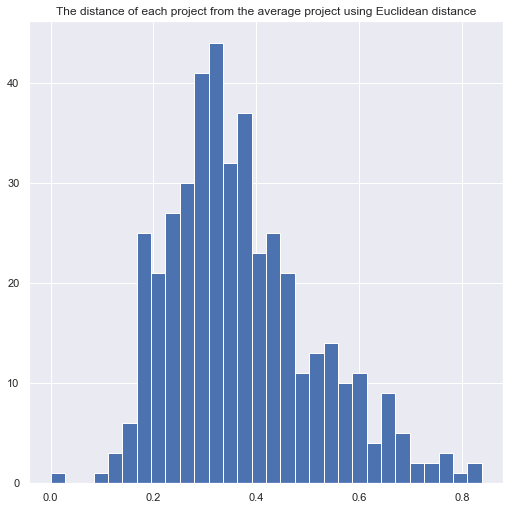

In [772]:
_ = plt.hist(dist_eu, bins=30)
plt.title("The distance of each project from the average project using Euclidean distance")
plt.show()

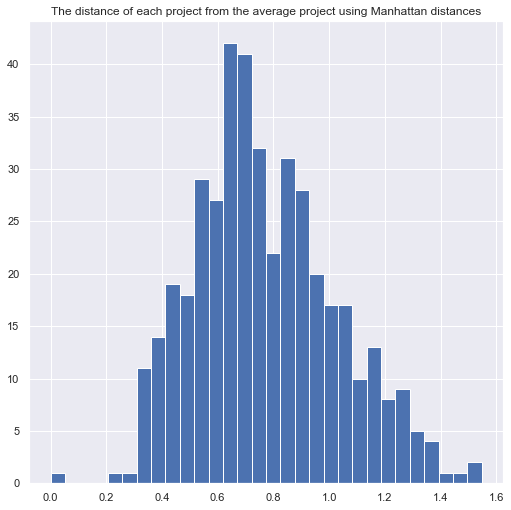

In [773]:
# Using the Manhattan distance we calculate all distances (424x424).
# Then we take the last argument in that ndarray of arrays, which
# corresponds to the previously added 'average project'.
# As the distance from the average project to the average project
# is not relevant (and 0 anyways), we drop the last distance score.
dist_mh = scipy.spatial.distance.cdist(topic_distributions_avg, topic_distributions_avg, 'cityblock')[-1]

_ = plt.hist(dist_mh, bins=30)  
plt.title("The distance of each project from the average project using Manhattan distances")
plt.show()

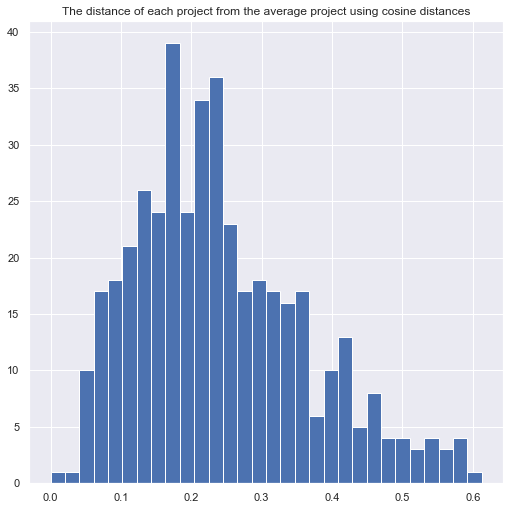

In [774]:
# Using the cosine distance we calculate all distances (424x424).
# Then we take the last argument in that ndarray of arrays, which
# corresponds to the previously added 'average project'.
# As the distance from the average project to the average project
# is not relevant (and 0 anyways), we drop the last distance score.
dist_co = scipy.spatial.distance.cdist(topic_distributions_avg, topic_distributions_avg, 'cosine')[-1]

_ = plt.hist(dist_co, bins=30) 
plt.title("The distance of each project from the average project using cosine distances")
plt.show()

We also wanted to calculate a Jaccard similarity score. However, further research indicated that Jaccard's metric only applies to sets and calculates a similarity based on the overlap of elements. There is no overlap of elements in our case, thus Jaccard's similarity score is not viable. 

In [775]:

for index, row in topic_distributions.iterrows():
    jaccard_score(row, average_project.values)


ValueError: continuous is not supported

In [ ]:
average_project.values

In [ ]:
jaccard_score(average_project.values, average_project.values)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html


https://stackoverflow.com/questions/43194060/jaccard-similarity-score-raises-valueerror-continuous-multioutput-is-not-suppor

### H2: Focusing on fewer topics increases the chance of project success.

Analytically, we define "the number of topics a project focusses on" as the sum per project of each topic that has a topic proportion above 0.10.

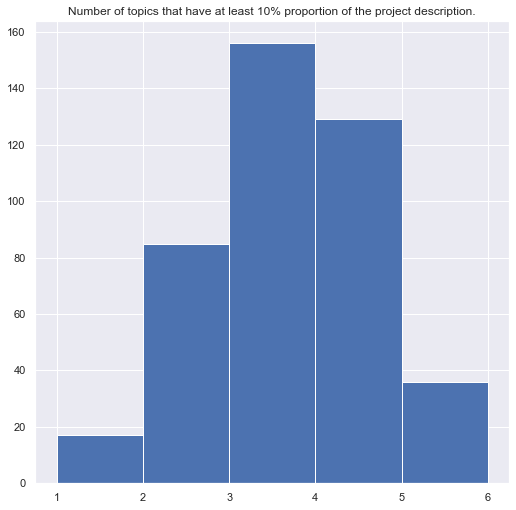

In [776]:
number_of_topics = topic_distributions[topic_distributions >= 0.1].count(axis=1)

_ = plt.hist(number_of_topics, bins=5)
plt.title("Number of topics that have at least 10% proportion of the project description.")
plt.show()

## Kickstarter data

In [790]:
data = pd.read_csv("C:/Users/Rodger/Documents/Data Science/DS&E/Y2021S1/Strategy & Business Models/SBM/final_data.csv")
#data

In [973]:
df = data.copy()

# We count the number of words of the (cleaned) description,
# by creating a string instance of the pandas series, splitting
# by spaces (which we know works due to the preprocessing), then
# creating a string instance again (allows for series operators)
# and ask the length of each element.
df['description_length'] = df['clean'].str.split(" ").str.len()

# create y
# (yes, it's a spelling error, as it should be successful
# and yes, there's some irony involved here)
y_success = df['succesful']

# Drop irrelevant data for the regression (for convenience)
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Blurb', 'my_id', 'Category', 'Location', 'Staff_recommended', 
                 'Created_at', 'Launched_at', 'Deadline', 'Disable_Communication', 'Project_nb_FAQ', 
                 'Project_Community_top_cities', 'Project_Community_top_countries', 'Project_Community_nb_new_backers', 
                 'Project_Community_nb_returning_backers', 'Creator_description', 'Creator_nb_projects', 
                 'Creator_date_joined', 'Creator_nb_backed', 'Creator_location', 'Creator_made_comments', 
                 'Project_nb_comments', 'Project_description', 'number_backers_log', 'categorical', 'remainder', 
                 'percentage_log', 'percentage', 'flops', 'rockstars', 'clean',
                ], axis=1, inplace=True)
df

,creator_slug,project_slug,Goal_USD,Pledge_USD,Number_Backers,Project_nb_updates,succesful,sparse_terms,duration,update_freq,description_length
0,1655200223,the-worlds-most-advanced-stain-and-odour-repel...,16736.25,128125.83,1529.0,2.0,True,57,43,0.046512,507
1,slingboard,worlds-first-2-in-1-paddleboard-skateboard-hybrid,10000.00,2205.00,15.0,0.0,False,10,41,0.000000,106
2,70979829,ar-interactive-marketing-products,17000.00,62.00,5.0,0.0,False,10,60,0.000000,162
3,1394449697,bolt-drones-introducing-a-whole-new-flight-exp...,100000.00,218522.77,1055.0,10.0,True,51,46,0.217391,843
4,1760623143,complete-guide-to-self-promotion-for-techies-a...,512.28,1169.28,17.0,2.0,True,34,16,0.125000,550
...,...,...,...,...,...,...,...,...,...,...,...
418,541327450,inform8r-the-clean-messaging-app,30000.00,552.00,5.0,4.0,False,108,30,0.133333,1333
419,finncast,live-video-broadcast-software-with-a-virtual-c...,28106.09,221.48,5.0,0.0,False,10,30,0.000000,125
420,floraforplants,flora-your-intelligent-plant-watering-ally,103458.01,2249.47,51.0,0.0,False,34,30,0.000000,398
421,457723537,prime-hunting-server-farm,9196.72,2.63,2.0,0.0,False,52,28,0.000000,497


In [974]:
# Adding the two newly created predictors
df['number_of_topics'] = number_of_topics
df['topic_uniqueness_eu'] = dist_eu[0:423]
df['topic_uniqueness_mh'] = dist_mh[0:423]
df['topic_uniqueness_co'] = dist_co[0:423]

## Helper functions

These functions will be called everytime a new model is fit.

In [975]:
def model_diagnostics(model, X):
    '''
    This is a post-regression function which is called by the fit_probit function.
    It contains plots of partial regressions, a prediction table,
    a table of VIFs and a correlation matrix.
    As everything is displayed during runtime, it does not return anything.
    '''
    
    # Steps to remove redundant values
    mask = np.zeros_like(X.corr())
    mask[np.triu_indices_from(mask)] = True

    # How to remove redundant correlation
    # <https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib>
    # Correlation matrix
    sns.set(rc={'figure.figsize': (8.5,8.5)})
    sns.heatmap(X.corr().round(2), vmin=-1, vmax=1, square=True, cmap='vlag', annot=True, mask=mask);
    
    # Prediction table
    display(model.pred_table())
    
    # For each X, calculate VIF and save in dataframe
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    # Source: https://etav.github.io/python/vif_factor_python.html
    display(vif)
    
    # Partial regressions
    fig = sm.graphics.plot_partregress_grid(model)
    fig.tight_layout(pad=1.5)
    
    

In [976]:
def fit_probit(X, y): 
    '''
    This function fits the probit model based on the feature set X after adding an intercept.
    After fitting, it displays the summary, calls the function model_diagnostics for 
    additional output, and returns the model object.  
    '''
    # Add an intercept
    X_n = statsmodels.tools.tools.add_constant(X, prepend=False, has_constant='skip')
    
    # Fitting the model
    log_reg = sm.Probit(y, X_n).fit() 
    
    display(log_reg.summary())
    model_diagnostics(log_reg, X)
    
    # Returning the trained model
    return log_reg

# Hypothesis testing: univariate analyses
Comparing features in a vacuum, compared to the baseline of section 2.1.

## Can we create a baseline model consistent with the literature?

Based on our literature review, we take the following features as baseline:
* Project funding goal
* Project duration
* Length of description
* Number of project updates
* Number of backers
* Amount of sparse terms (as proxy for spelling errors)


We first check whether these results are consistent with our data.

In [977]:
literature_predictors = ['Goal_USD', 'duration', 'description_length', 'Project_nb_updates', 'Number_Backers', 'sparse_terms']

Optimization terminated successfully.
         Current function value: 0.209195
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              succesful   No. Observations:                  423
Model:                         Probit   Df Residuals:                      416
Method:                           MLE   Df Model:                            6
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.6565
Time:                        14:23:29   Log-Likelihood:                -88.490
converged:                       True   LL-Null:                       -257.63
Covariance Type:            nonrobust   LLR p-value:                 5.064e-70
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Goal_USD           -3.428e-05   5.78e-06     -5.932      0.000   -4.56e-05    -2.3e-05
duration              -0.0183      0.008     -2.337      0.019      -0.034      -0.003
description_length     0.0011      0.001      1.488      0.137      -0.000       0.003
Project_nb_updates     0.1358      0.035      3.895      0.000       0.067       0.204
Number_Backers         0.0270      0.005      5.910      0.000       0.018       0.036
sparse_terms          -0.0129      0.008     -1.700      0.089      -0.028       0.002
const                  0.1480      0.359      0.412      0.680      -0.556       0.852
======================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

array([[111.,  15.],
       [ 25., 272.]])

,VIF Factor,features
0,1.331108,Goal_USD
1,2.576520,duration
2,9.997447,description_length
3,2.134011,Project_nb_updates
4,1.343576,Number_Backers
5,7.460043,sparse_terms


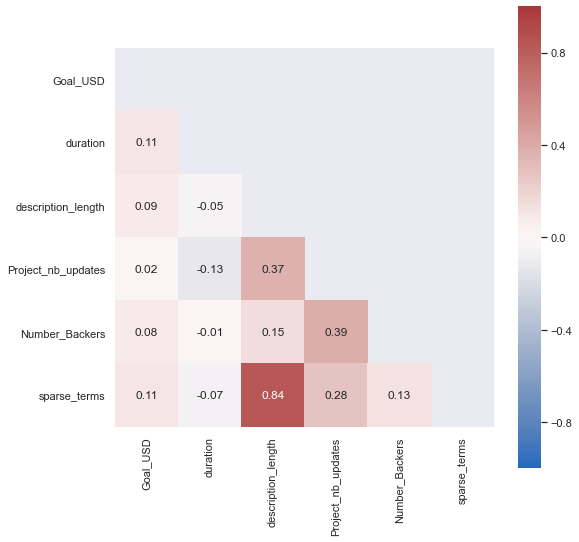

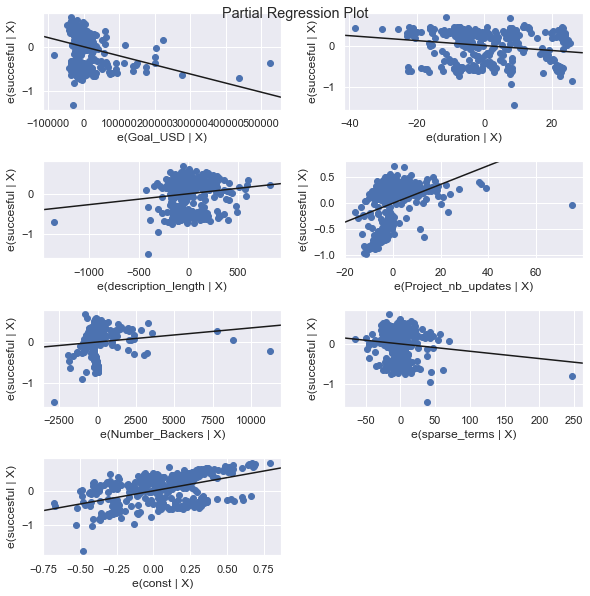

In [978]:
X_literature = df[literature_predictors]
model_literature = fit_probit(X_literature, y_success)

We see that in the model _description length_ (0.137) and _sparse terms_ (0.089) are not statistically significant; the remaining predictors are. The model performs quite well, with 111 TN and 272 TP. 

Furthermore, we see that both _description length_ (10.00) and _sparse terms_ (7.46) have a VIF of over 5, so they should be treated with caution. In the correlation matrix, we also see that these two rascals have a correlation of 0.84. All of this indicates that they largely contain the same info and one should be dropped. As _description length_ has the lower p-value and the higher VIF-value, we elect for _sparse terms_. 

Optimization terminated successfully.
         Current function value: 0.212029
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              succesful   No. Observations:                  423
Model:                         Probit   Df Residuals:                      417
Method:                           MLE   Df Model:                            5
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.6519
Time:                        14:23:33   Log-Likelihood:                -89.688
converged:                       True   LL-Null:                       -257.63
Covariance Type:            nonrobust   LLR p-value:                 1.917e-70
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Goal_USD            -3.35e-05    5.7e-06     -5.881      0.000   -4.47e-05   -2.23e-05
duration              -0.0176      0.008     -2.276      0.023      -0.033      -0.002
Project_nb_updates     0.1378      0.033      4.136      0.000       0.073       0.203
Number_Backers         0.0266      0.004      5.939      0.000       0.018       0.035
sparse_terms          -0.0041      0.004     -1.128      0.259      -0.011       0.003
const                  0.2490      0.348      0.715      0.474      -0.433       0.931
======================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

array([[111.,  15.],
       [ 24., 273.]])

,VIF Factor,features
0,1.331096,Goal_USD
1,2.200062,duration
2,1.966674,Project_nb_updates
3,1.342056,Number_Backers
4,2.256497,sparse_terms


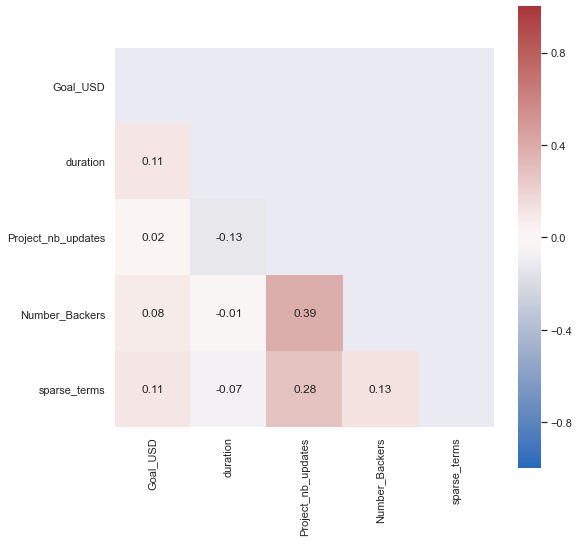

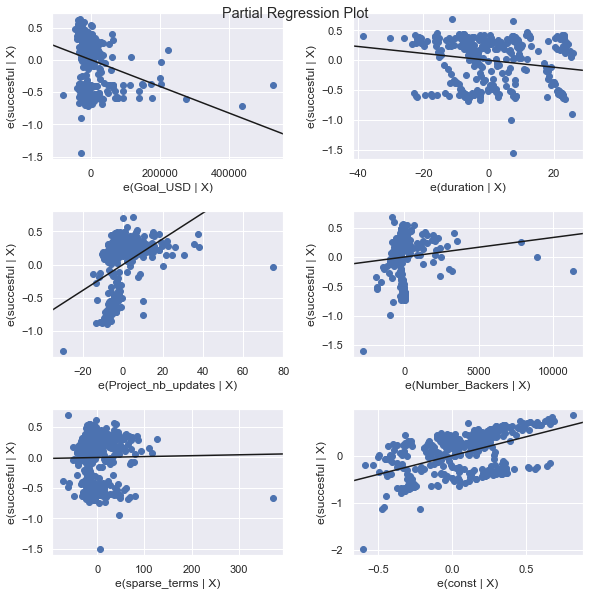

In [979]:
no_description_length = ['Goal_USD', 'duration', 'Project_nb_updates', 'Number_Backers', 'sparse_terms']
X_no_descr = df[no_description_length]
model_no_description = fit_probit(X_no_descr, y_success)

### Yes, largely.

Though _description length_ and _sparse terms_ are not statistically significant, we only have to drop one of them to combat multicollinearity. The remaining predictor set, dubbed _baseline_predictors_ provides a decently performing model, in line with the literature. We will take those predictors as standard.

In [980]:
baseline_predictors = ['Goal_USD', 'duration', 'Project_nb_updates', 'Number_Backers', 'sparse_terms']

## H1: Focusing on unique topics leads to commercial project success

### Using Euclidean distance

Optimization terminated successfully.
         Current function value: 0.203444
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              succesful   No. Observations:                  423
Model:                         Probit   Df Residuals:                      416
Method:                           MLE   Df Model:                            6
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.6660
Time:                        14:23:37   Log-Likelihood:                -86.057
converged:                       True   LL-Null:                       -257.63
Covariance Type:            nonrobust   LLR p-value:                 4.573e-71
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Goal_USD            -3.438e-05   5.91e-06     -5.822      0.000    -4.6e-05   -2.28e-05
duration               -0.0186      0.008     -2.354      0.019      -0.034      -0.003
Project_nb_updates      0.1388      0.034      4.084      0.000       0.072       0.205
Number_Backers          0.0270      0.005      5.800      0.000       0.018       0.036
sparse_terms           -0.0037      0.004     -1.003      0.316      -0.011       0.004
topic_uniqueness_eu    -2.2109      0.834     -2.652      0.008      -3.845      -0.577
const                   1.1347      0.489      2.319      0.020       0.176       2.094
=======================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

array([[111.,  15.],
       [ 22., 275.]])

,VIF Factor,features
0,1.331378,Goal_USD
1,5.403546,duration
2,1.991061,Project_nb_updates
3,1.355558,Number_Backers
4,2.321932,sparse_terms
5,5.093677,topic_uniqueness_eu


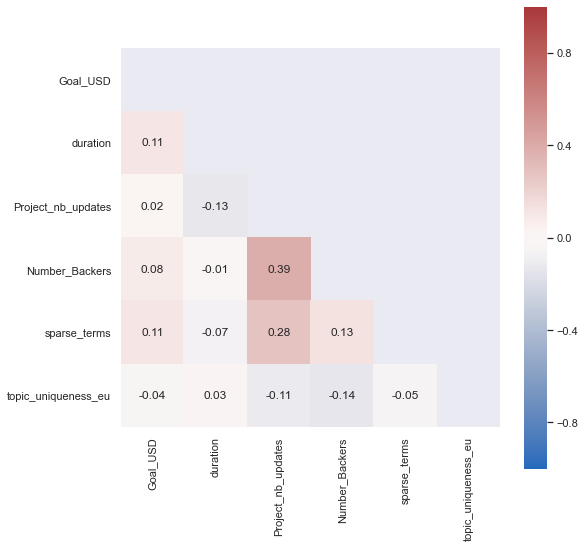

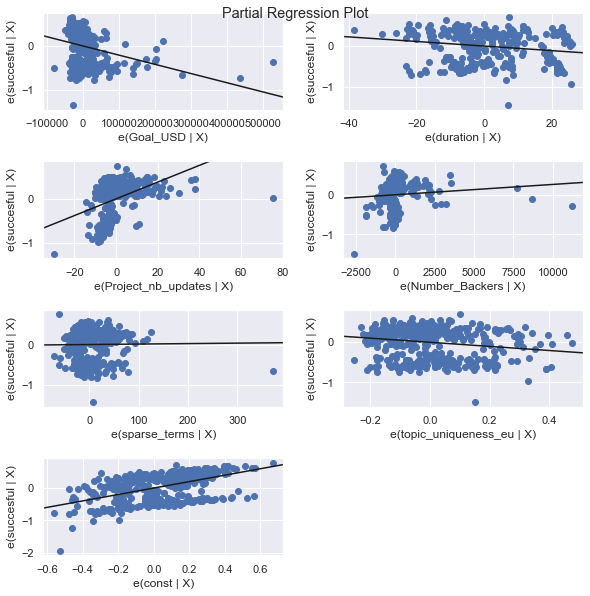

In [981]:
X_uniqueness_eu = df[baseline_predictors + ['topic_uniqueness_eu']]
model_uniqueness_eu = fit_probit(X_uniqueness_eu, y_success)

### No. 
Statistically significant, negative coefficient. Our hypothesis using Euclidean distance would be rejected, as focusing on unique topics seems to lead to a lack of commercial project success.

### Using Manhattan distance

Optimization terminated successfully.
         Current function value: 0.200273
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              succesful   No. Observations:                  423
Model:                         Probit   Df Residuals:                      416
Method:                           MLE   Df Model:                            6
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.6712
Time:                        14:23:41   Log-Likelihood:                -84.715
converged:                       True   LL-Null:                       -257.63
Covariance Type:            nonrobust   LLR p-value:                 1.215e-71
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Goal_USD            -3.487e-05   5.99e-06     -5.825      0.000   -4.66e-05   -2.31e-05
duration               -0.0189      0.008     -2.368      0.018      -0.035      -0.003
Project_nb_updates      0.1395      0.034      4.079      0.000       0.072       0.207
Number_Backers          0.0268      0.005      5.735      0.000       0.018       0.036
sparse_terms           -0.0042      0.004     -1.134      0.257      -0.012       0.003
topic_uniqueness_mh    -1.4699      0.478     -3.077      0.002      -2.406      -0.534
const                   1.4978      0.543      2.760      0.006       0.434       2.561
=======================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

array([[111.,  15.],
       [ 21., 276.]])

,VIF Factor,features
0,1.331149,Goal_USD
1,6.130541,duration
2,1.989305,Project_nb_updates
3,1.353294,Number_Backers
4,2.321836,sparse_terms
5,5.922915,topic_uniqueness_mh


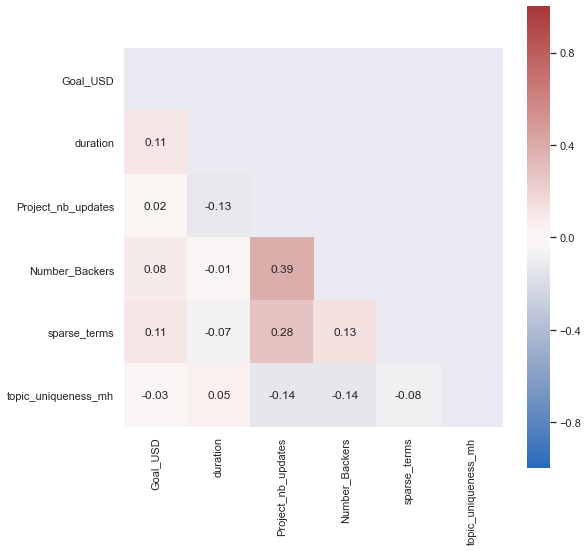

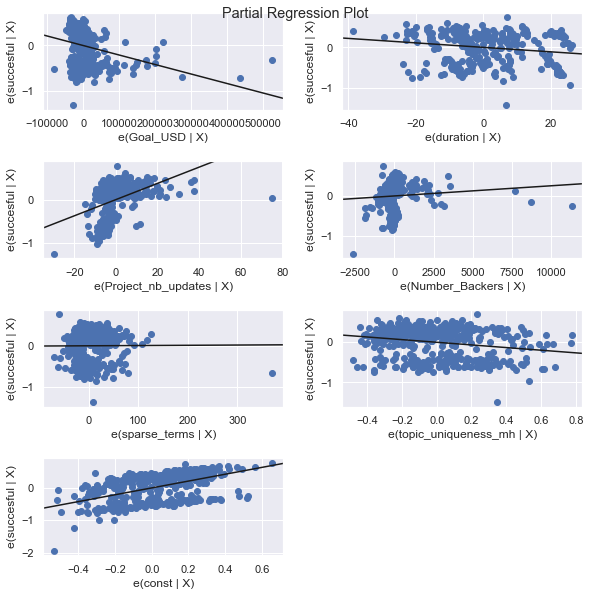

In [982]:
X_uniqueness_mh = df[baseline_predictors + ['topic_uniqueness_mh']]
model_uniqueness_mh = fit_probit(X_uniqueness_mh, y_success)

### No. 
Statistically significant, negative coefficient. Our hypothesis using Manhattan distance would be rejected, as focusing on unique topics seems to lead to a lack of commercial project success.

### Using Cosine distance

Optimization terminated successfully.
         Current function value: 0.199540
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              succesful   No. Observations:                  423
Model:                         Probit   Df Residuals:                      416
Method:                           MLE   Df Model:                            6
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.6724
Time:                        14:23:44   Log-Likelihood:                -84.406
converged:                       True   LL-Null:                       -257.63
Covariance Type:            nonrobust   LLR p-value:                 8.942e-72
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Goal_USD            -3.486e-05   5.98e-06     -5.834      0.000   -4.66e-05   -2.32e-05
duration               -0.0197      0.008     -2.454      0.014      -0.035      -0.004
Project_nb_updates      0.1427      0.034      4.180      0.000       0.076       0.210
Number_Backers          0.0272      0.005      5.798      0.000       0.018       0.036
sparse_terms           -0.0031      0.003     -0.901      0.368      -0.010       0.004
topic_uniqueness_co    -3.0034      0.949     -3.166      0.002      -4.863      -1.144
const                   1.0582      0.441      2.398      0.016       0.193       1.923
=======================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

array([[112.,  14.],
       [ 19., 278.]])

,VIF Factor,features
0,1.331345,Goal_USD
1,4.364530,duration
2,1.989824,Project_nb_updates
3,1.356111,Number_Backers
4,2.302708,sparse_terms
5,3.800606,topic_uniqueness_co


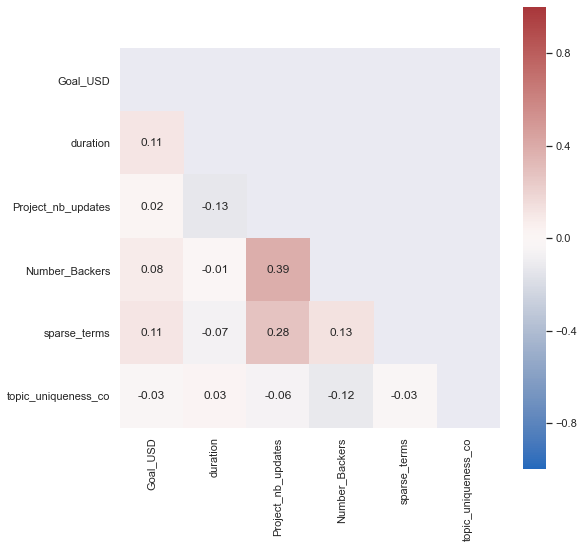

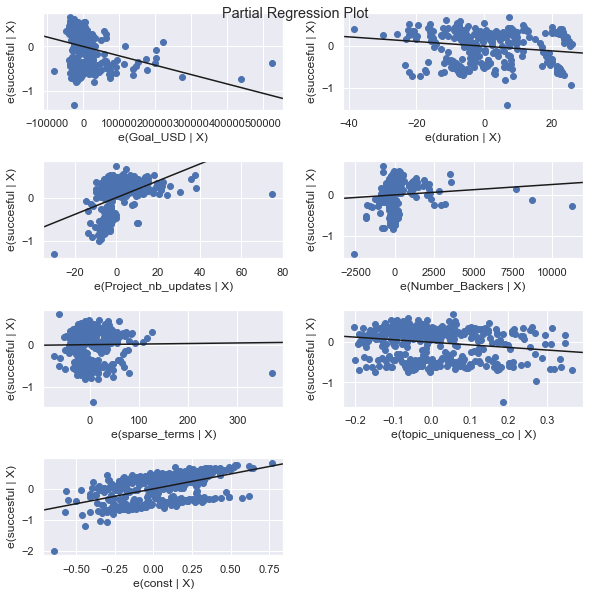

In [983]:
X_uniqueness_co = df[baseline_predictors + ['topic_uniqueness_co']]
model_uniqueness_co = fit_probit(X_uniqueness_co, y_success)

### No.
Statistically significant, negative coefficient. Our hypothesis using Cosine distance would be rejected, as focusing on unique topics seems to lead to a lack of commercial project success.

## H2: Focusing on fewer topics increases the chance of project success.


Optimization terminated successfully.
         Current function value: 0.211468
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              succesful   No. Observations:                  423
Model:                         Probit   Df Residuals:                      416
Method:                           MLE   Df Model:                            6
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.6528
Time:                        14:23:48   Log-Likelihood:                -89.451
converged:                       True   LL-Null:                       -257.63
Covariance Type:            nonrobust   LLR p-value:                 1.309e-69
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Goal_USD           -3.353e-05   5.71e-06     -5.876      0.000   -4.47e-05   -2.23e-05
duration              -0.0174      0.008     -2.244      0.025      -0.033      -0.002
Project_nb_updates     0.1352      0.033      4.037      0.000       0.070       0.201
Number_Backers         0.0266      0.004      5.912      0.000       0.018       0.035
sparse_terms          -0.0041      0.004     -1.102      0.270      -0.011       0.003
number_of_topics       0.0784      0.114      0.688      0.491      -0.145       0.302
const                  0.0040      0.497      0.008      0.994      -0.970       0.978
======================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

array([[110.,  16.],
       [ 26., 271.]])

,VIF Factor,features
0,1.332433,Goal_USD
1,5.483460,duration
2,2.070284,Project_nb_updates
3,1.351215,Number_Backers
4,2.359267,sparse_terms
5,6.321041,number_of_topics


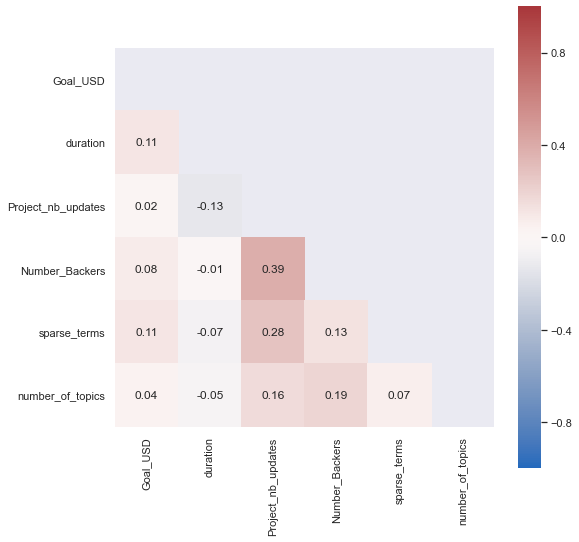

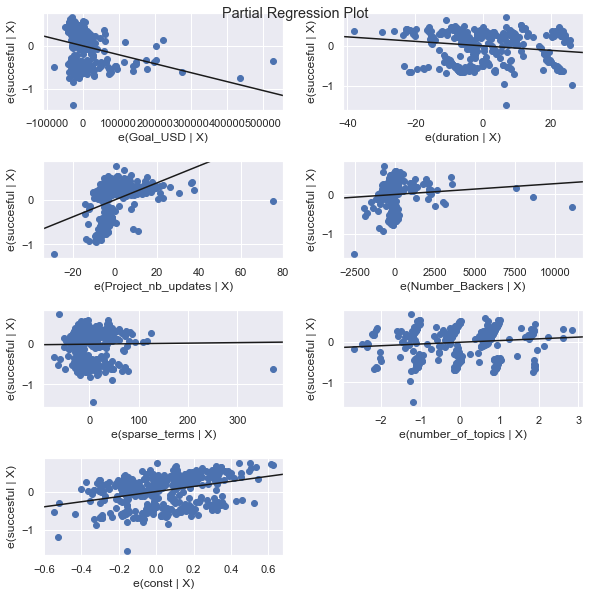

In [984]:
X_fewer_topics = df[baseline_predictors + ['number_of_topics']]
model_fewer_topics = fit_probit(X_fewer_topics, y_success)

### No.

The predictor not statistically significant (p = 0.491), the coefficient is positive and the prediction matrix is worse than the baseline model. Though _duration_ and _number of topics_ have a VIF of (just) higher than 5, their correlation is just -0.05 and removal of one of the two would not change radically. All in all, we state that the hypothesis is not supported, and there is no support to say that focusing on fewer topics increases the chance of project success.

# Hypothesis testing: multivariate analyses

## Does adding both _topic uniqueness_ and _number of topics_ result in a better model?

In the univariate analyses we saw that _topic_uniqueness_ was statistically significant (although contrary to our hypotheses, it had a negative coefficient). We wonder whether that still holds when adding _number_of_topics_ as well. 

Optimization terminated successfully.
         Current function value: 0.197654
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              succesful   No. Observations:                  423
Model:                         Probit   Df Residuals:                      415
Method:                           MLE   Df Model:                            7
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.6755
Time:                        14:23:52   Log-Likelihood:                -83.608
converged:                       True   LL-Null:                       -257.63
Covariance Type:            nonrobust   LLR p-value:                 3.235e-71
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Goal_USD            -3.505e-05   6.02e-06     -5.822      0.000   -4.69e-05   -2.33e-05
duration               -0.0205      0.008     -2.535      0.011      -0.036      -0.005
Project_nb_updates      0.1505      0.035      4.268      0.000       0.081       0.220
Number_Backers          0.0274      0.005      5.802      0.000       0.018       0.037
sparse_terms           -0.0030      0.003     -0.908      0.364      -0.009       0.003
topic_uniqueness_co    -3.8040      1.165     -3.266      0.001      -6.087      -1.521
number_of_topics       -0.1759      0.140     -1.257      0.209      -0.450       0.098
const                   1.8183      0.755      2.407      0.016       0.338       3.299
=======================================================================================

Possibly complete quasi-separation: A fraction 0.42 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

array([[114.,  12.],
       [ 17., 280.]])

,VIF Factor,features
0,1.332622,Goal_USD
1,7.960422,duration
2,2.099257,Project_nb_updates
3,1.364083,Number_Backers
4,2.413580,sparse_terms
5,3.812267,topic_uniqueness_co
6,6.340435,number_of_topics


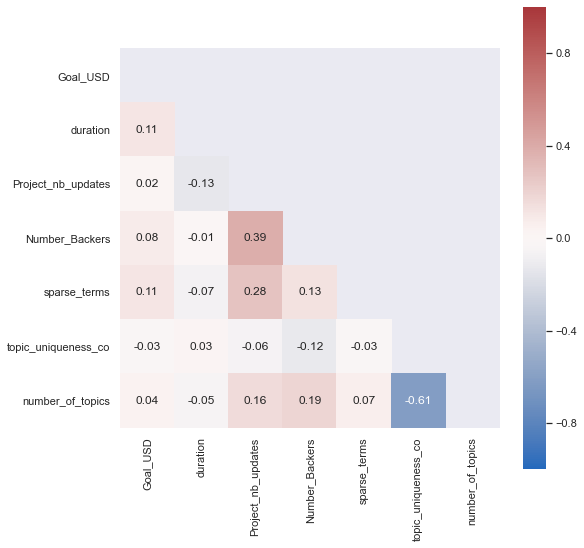

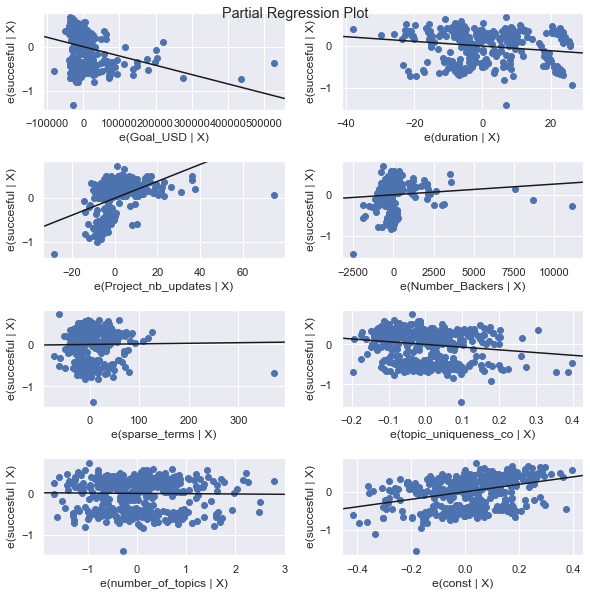

In [985]:
X_all = df[baseline_predictors + ['topic_uniqueness_co', 'number_of_topics']]
model_all = fit_probit(X_all, y_success)

### No.

We see that _topic uniqueness_ remains statistically significant, though the coefficient is even more negative. _Number of topics_  ohwever is not statistically significant (p = 0.209). Additionally, both _duration_ and _number of topics_ have a VIF of over 5. All in all this suggests that the model with both _topic uniqueness_ and _number of topics_ does not significantly improve the model with just _topic uniqueness_. 

In [986]:
final_predictor_set = baseline_predictors + ['topic_uniqueness_co']
final_predictor_set

['Goal_USD',
 'duration',
 'Project_nb_updates',
 'Number_Backers',
 'sparse_terms',
 'topic_uniqueness_co']

# Interaction effects

We are curious to the potential effect of any moderator. Thus, we create all interaction effects.

In [987]:
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(df[final_predictor_set])

interaction_df = pd.DataFrame(x_interaction, columns = ['Goal_USD', 'duration', 'Project_nb_updates', 
    'Number_Backers', 'sparse_terms', 'topic_uniqueness_co', 
                                                        
        'Goal_USD:duration', 
        'Goal_USD:Project_nb_updates', 
        'Goal_USD:Number_Backers', 
        'Goal_USD:sparse_terms', 
        'Goal_USD:topic_uniqueness_co', 

        'duration:Project_nb_updates', 
        'duration:Number_Backers', 
        'duration:sparse_terms', 
        'duration:topic_uniqueness_co', 

        'Project_nb_updates:Number_Backers', 
        'Project_nb_updates:sparse_terms', 
        'Project_nb_updates:topic_uniqueness_co',

        'Number_Backers:sparse_terms',
        'Number_Backers:topic_uniqueness_co',

        'sparse_terms:topic_uniqueness_co',
       ])

In [988]:
interaction_df

,Goal_USD,duration,Project_nb_updates,Number_Backers,sparse_terms,topic_uniqueness_co,Goal_USD:duration,Goal_USD:Project_nb_updates,Goal_USD:Number_Backers,Goal_USD:sparse_terms,Goal_USD:topic_uniqueness_co,duration:Project_nb_updates,duration:Number_Backers,duration:sparse_terms,duration:topic_uniqueness_co,Project_nb_updates:Number_Backers,Project_nb_updates:sparse_terms,Project_nb_updates:topic_uniqueness_co,Number_Backers:sparse_terms,Number_Backers:topic_uniqueness_co,sparse_terms:topic_uniqueness_co
0,16736.25,43.0,2.0,1529.0,57.0,0.232398,719658.75,33472.50,2.558973e+07,953966.25,3889.470148,86.0,65747.0,2451.0,9.993112,3058.0,114.0,0.464796,87153.0,355.336462,13.246683
1,10000.00,41.0,0.0,15.0,10.0,0.226646,410000.00,0.00,1.500000e+05,100000.00,2266.462195,0.0,615.0,410.0,9.292495,0.0,0.0,0.000000,150.0,3.399693,2.266462
2,17000.00,60.0,0.0,5.0,10.0,0.200218,1020000.00,0.00,8.500000e+04,170000.00,3403.710274,0.0,300.0,600.0,12.013095,0.0,0.0,0.000000,50.0,1.001091,2.002183
3,100000.00,46.0,10.0,1055.0,51.0,0.197875,4600000.00,1000000.00,1.055000e+08,5100000.00,19787.523204,460.0,48530.0,2346.0,9.102261,10550.0,510.0,1.978752,53805.0,208.758370,10.091637
4,512.28,16.0,2.0,17.0,34.0,0.242698,8196.48,1024.56,8.708760e+03,17417.52,124.329401,32.0,272.0,544.0,3.883170,34.0,68.0,0.485396,578.0,4.125868,8.251737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,30000.00,30.0,4.0,5.0,108.0,0.420166,900000.00,120000.00,1.500000e+05,3240000.00,12604.985281,120.0,150.0,3240.0,12.604985,20.0,432.0,1.680665,540.0,2.100831,45.377947
419,28106.09,30.0,0.0,5.0,10.0,0.323939,843182.70,0.00,1.405305e+05,281060.90,9104.669606,0.0,150.0,300.0,9.718182,0.0,0.0,0.000000,50.0,1.619697,3.239394
420,103458.01,30.0,0.0,51.0,34.0,0.577261,3103740.30,0.00,5.276359e+06,3517572.34,59722.295467,0.0,1530.0,1020.0,17.317836,0.0,0.0,0.000000,1734.0,29.440321,19.626881
421,9196.72,28.0,0.0,2.0,52.0,0.342744,257508.16,0.00,1.839344e+04,478229.44,3152.120111,0.0,56.0,1456.0,9.596831,0.0,0.0,0.000000,104.0,0.685488,17.822685


## Does _goal_ have an interaction effect?

Semantically, _goal_ and _duration_ (literature), _goal_ and _number of updates_ (a higher goal could require more investment from the creator), _goal_ and _sparse terms_ (ambitious projects face greater scrutiny and fewer spelling mistakes) and _goal_ and _topic uniqueness_ (unknown direction, but creators could decide their goal based on how unique they deem their product, and by extension, how unique their description will be)

Optimization terminated successfully.
         Current function value: 0.184322
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              succesful   No. Observations:                  423
Model:                         Probit   Df Residuals:                      412
Method:                           MLE   Df Model:                           10
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.6974
Time:                        14:23:58   Log-Likelihood:                -77.968
converged:                       True   LL-Null:                       -257.63
Covariance Type:            nonrobust   LLR p-value:                 4.186e-71
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Goal_USD                     -4.122e-05   5.12e-05     -0.806      0.421      -0.000    5.91e-05
duration                        -0.0192      0.011     -1.752      0.080      -0.041       0.002
Project_nb_updates               0.1030      0.049      2.095      0.036       0.007       0.199
Number_Backers                   0.0271      0.005      5.068      0.000       0.017       0.038
sparse_terms                    -0.0070      0.006     -1.224      0.221      -0.018       0.004
topic_uniqueness_co             -1.2228      1.375     -0.889      0.374      -3.918       1.472
Goal_USD:duration            -1.788e-07    1.1e-06     -0.162      0.871   -2.34e-06    1.98e-06
Goal_USD:Project_nb_updates   2.739e-06   4.11e-06      0.666      0.506   -5.32e-06    1.08e-05
Goal_USD:sparse_terms           4.8e-07   4.61e-07      1.042      0.297   -4.23e-07    1.38e-06
Goal_USD:topic_uniqueness_co    -0.0002      0.000     -1.437      0.151      -0.000    5.64e-05
const                            1.0312      0.573      1.801      0.072      -0.091       2.153
================================================================================================

Possibly complete quasi-separation: A fraction 0.46 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

array([[109.,  17.],
       [ 17., 280.]])

,VIF Factor,features
0,12.794286,Goal_USD
1,5.355777,duration
2,2.869866,Project_nb_updates
3,1.389326,Number_Backers
4,3.139778,sparse_terms
5,5.277974,topic_uniqueness_co
6,8.488013,Goal_USD:duration
7,5.368451,Goal_USD:Project_nb_updates
8,6.094446,Goal_USD:sparse_terms
9,11.132776,Goal_USD:topic_uniqueness_co


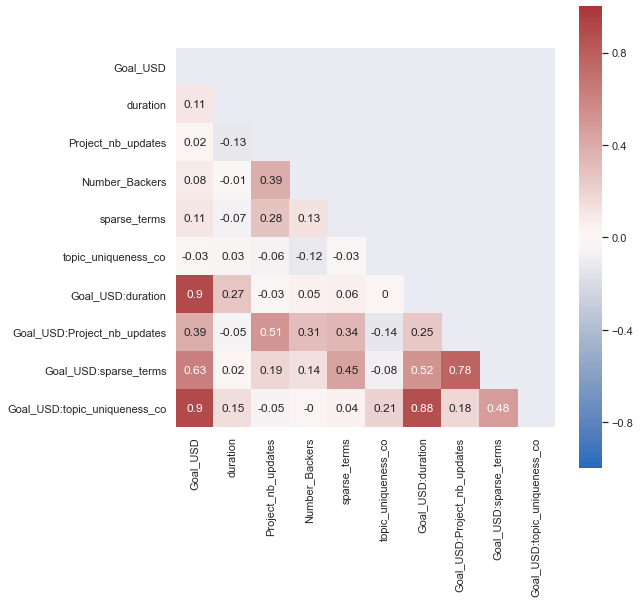

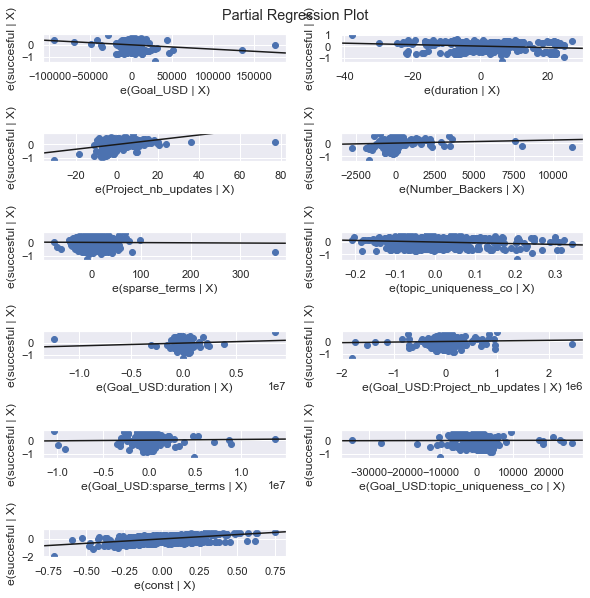

In [989]:
df_mod_goal = interaction_df[final_predictor_set + ['Goal_USD:duration', 
        'Goal_USD:Project_nb_updates',  
        'Goal_USD:sparse_terms', 
        'Goal_USD:topic_uniqueness_co',
                                                   ]]

model_mod_goal = fit_probit(df_mod_goal, y_success)

### No.

We see that none of the theorized effects are statistically significant.

## Does _duration_ have an interaction effect?

We hypothesise _duration_ and _number of updates_ to have an interaction effect (longer projects provide more opportunities for updates). 

Optimization terminated successfully.
         Current function value: 0.188104
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              succesful   No. Observations:                  423
Model:                         Probit   Df Residuals:                      415
Method:                           MLE   Df Model:                            7
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.6912
Time:                        14:24:03   Log-Likelihood:                -79.568
converged:                       True   LL-Null:                       -257.63
Covariance Type:            nonrobust   LLR p-value:                 6.030e-73
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Goal_USD                    -3.841e-05   6.45e-06     -5.953      0.000   -5.11e-05   -2.58e-05
duration                       -0.0055      0.009     -0.597      0.550      -0.023       0.013
Project_nb_updates              0.5099      0.136      3.761      0.000       0.244       0.776
Number_Backers                  0.0259      0.005      5.427      0.000       0.017       0.035
sparse_terms                   -0.0026      0.004     -0.737      0.461      -0.010       0.004
topic_uniqueness_co            -3.4579      1.015     -3.408      0.001      -5.446      -1.469
duration:Project_nb_updates    -0.0084      0.003     -2.937      0.003      -0.014      -0.003
const                           0.6101      0.480      1.271      0.204      -0.330       1.551
===============================================================================================

Possibly complete quasi-separation: A fraction 0.45 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

array([[115.,  11.],
       [ 22., 275.]])

,VIF Factor,features
0,1.339002,Goal_USD
1,5.147209,duration
2,24.247387,Project_nb_updates
3,1.366639,Number_Backers
4,2.310727,sparse_terms
5,4.042467,topic_uniqueness_co
6,25.391809,duration:Project_nb_updates


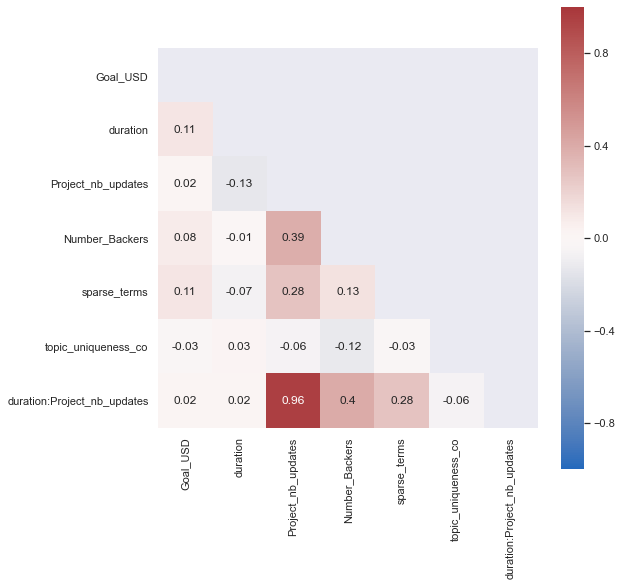

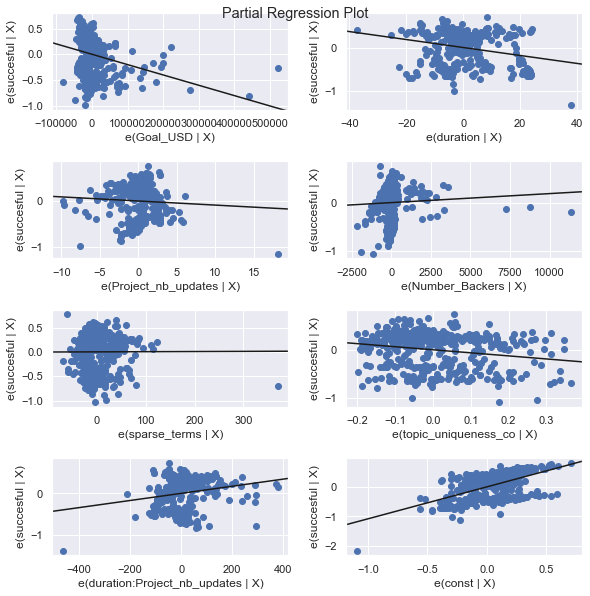

In [990]:
df_mod_duration = interaction_df[final_predictor_set + ['duration:Project_nb_updates', 
            ]]

model_mod_duration = fit_probit(df_mod_duration, y_success)

### Possibly.

Though the interaction variable is statistically significant (p = 0.003), duration is not (p = 0.550). Their VIFs are ~25 and the correlation between _duration:number of updates_ and _number of updates_ is 0.96. 

## Does _number of updates_ have an interaction effect?

We pose that _number of updates_ and _number of backers_ (a higher number of backers allows for new updates regarding project status/expressing gratitude) and _number of updates_ and _topic uniqueness_ (more unique (fringe) topics might understate higher interaction with the pledgers) might have an interaction effect.

Optimization terminated successfully.
         Current function value: 0.190993
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              succesful   No. Observations:                  423
Model:                         Probit   Df Residuals:                      414
Method:                           MLE   Df Model:                            8
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.6864
Time:                        14:24:08   Log-Likelihood:                -80.790
converged:                       True   LL-Null:                       -257.63
Covariance Type:            nonrobust   LLR p-value:                 1.486e-71
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Goal_USD                               -4.954e-05   1.13e-05     -4.397      0.000   -7.16e-05   -2.75e-05
duration                                  -0.0204      0.008     -2.497      0.013      -0.036      -0.004
Project_nb_updates                         0.2549      0.091      2.794      0.005       0.076       0.434
Number_Backers                             0.0215      0.006      3.868      0.000       0.011       0.032
sparse_terms                              -0.0029      0.003     -0.882      0.378      -0.009       0.004
topic_uniqueness_co                       -1.6107      1.128     -1.428      0.153      -3.821       0.599
Project_nb_updates:Number_Backers          0.0016      0.001      1.420      0.156      -0.001       0.004
Project_nb_updates:topic_uniqueness_co    -0.4640      0.212     -2.189      0.029      -0.879      -0.049
const                                      0.9170      0.492      1.864      0.062      -0.047       1.881
==========================================================================================================

Possibly complete quasi-separation: A fraction 0.46 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

array([[113.,  13.],
       [ 17., 280.]])

,VIF Factor,features
0,1.343361,Goal_USD
1,5.376634,duration
2,8.466240,Project_nb_updates
3,7.844076,Number_Backers
4,2.455047,sparse_terms
5,5.586622,topic_uniqueness_co
6,7.808262,Project_nb_updates:Number_Backers
7,7.250533,Project_nb_updates:topic_uniqueness_co


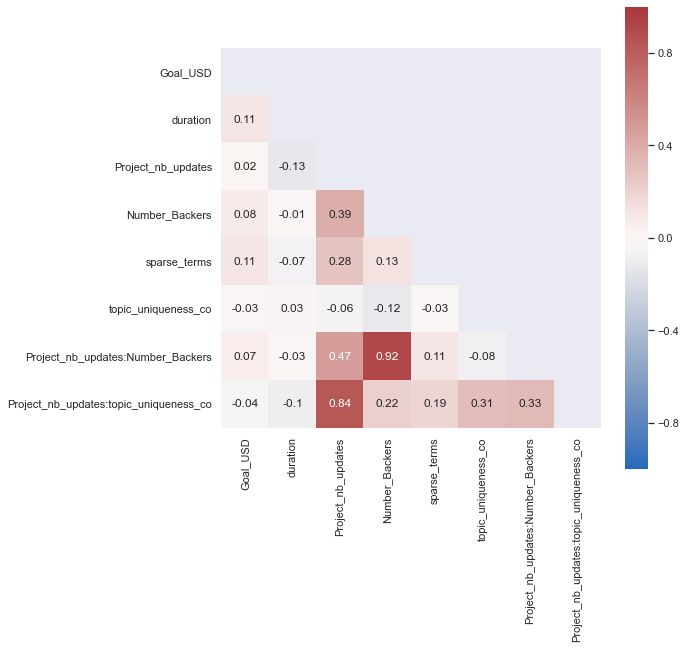

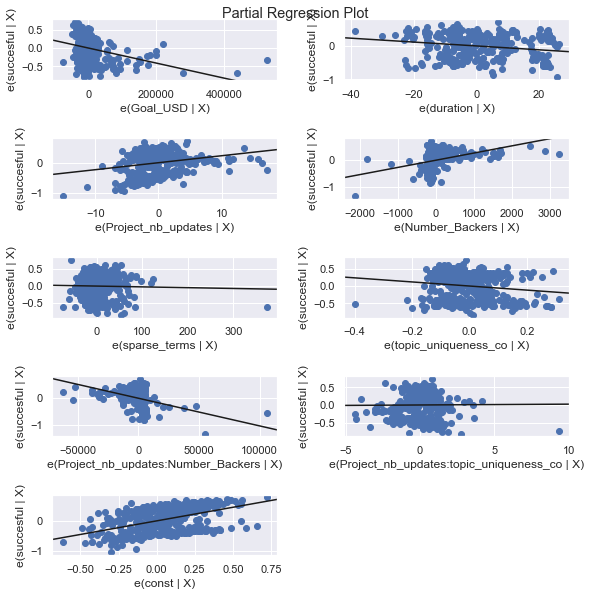

In [991]:
df_mod_updates = interaction_df[final_predictor_set + [  'Project_nb_updates:Number_Backers', 
        'Project_nb_updates:topic_uniqueness_co', ]]

model_mod_updates = fit_probit(df_mod_updates, y_success)

_Number of updates_ and _number of backers_ is not statistically significant, _number of updates_ with _topic uniqueness_ is. To allow for better interpretation regarding multicollinearity, we try the model again with just the latter interaction predictor added.

Optimization terminated successfully.
         Current function value: 0.193603
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              succesful   No. Observations:                  423
Model:                         Probit   Df Residuals:                      415
Method:                           MLE   Df Model:                            7
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.6821
Time:                        14:24:13   Log-Likelihood:                -81.894
converged:                       True   LL-Null:                       -257.63
Covariance Type:            nonrobust   LLR p-value:                 5.974e-72
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Goal_USD                               -3.718e-05   6.18e-06     -6.013      0.000   -4.93e-05   -2.51e-05
duration                                  -0.0202      0.008     -2.475      0.013      -0.036      -0.004
Project_nb_updates                         0.3084      0.086      3.580      0.000       0.140       0.477
Number_Backers                             0.0258      0.005      5.450      0.000       0.017       0.035
sparse_terms                              -0.0032      0.004     -0.906      0.365      -0.010       0.004
topic_uniqueness_co                       -1.6125      1.123     -1.436      0.151      -3.814       0.589
Project_nb_updates:topic_uniqueness_co    -0.4819      0.216     -2.231      0.026      -0.905      -0.058
const                                      0.7283      0.473      1.538      0.124      -0.200       1.656
==========================================================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

array([[114.,  12.],
       [ 21., 276.]])

,VIF Factor,features
0,1.342139,Goal_USD
1,5.324543,duration
2,8.440018,Project_nb_updates
3,1.397855,Number_Backers
4,2.419994,sparse_terms
5,5.576261,topic_uniqueness_co
6,7.152872,Project_nb_updates:topic_uniqueness_co


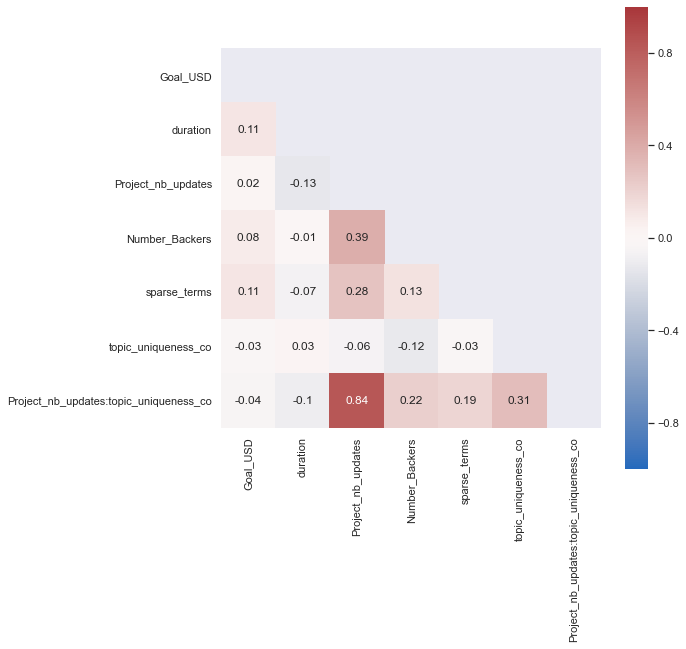

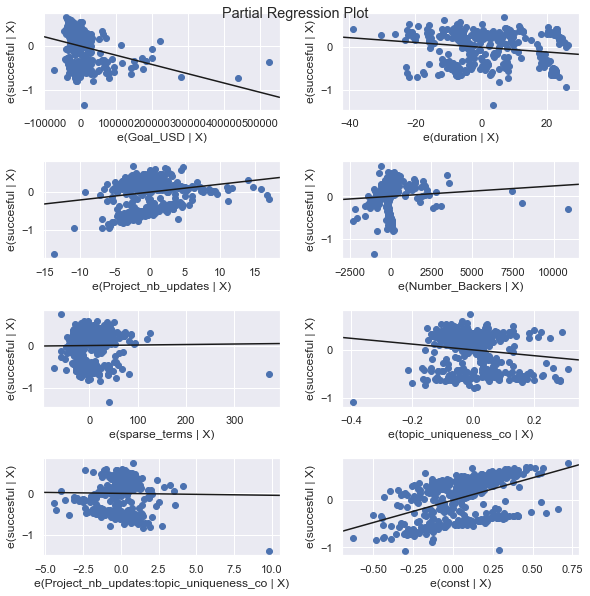

In [992]:
df_mod_updates = interaction_df[final_predictor_set + [
        'Project_nb_updates:topic_uniqueness_co', ]]

model_mod_updates = fit_probit(df_mod_updates, y_success)

### Possibly.

With 4 VIFs of above 5 and the non-significance of _topic uniqueness_ itself, we are in doubt whether this model is a better iteration.

## Does _number of backers_ have an interaction effect?

As unique topics might attract a specific audience, we pose that _number of backers_ could have an interaction effect with _topic uniqueness_.

Optimization terminated successfully.
         Current function value: 0.196413
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              succesful   No. Observations:                  423
Model:                         Probit   Df Residuals:                      415
Method:                           MLE   Df Model:                            7
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.6775
Time:                        14:24:17   Log-Likelihood:                -83.083
converged:                       True   LL-Null:                       -257.63
Covariance Type:            nonrobust   LLR p-value:                 1.928e-71
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Goal_USD                           -3.829e-05   6.65e-06     -5.758      0.000   -5.13e-05   -2.53e-05
duration                              -0.0198      0.008     -2.461      0.014      -0.036      -0.004
Project_nb_updates                     0.1439      0.034      4.183      0.000       0.076       0.211
Number_Backers                         0.0406      0.010      4.171      0.000       0.022       0.060
sparse_terms                          -0.0041      0.004     -1.078      0.281      -0.011       0.003
topic_uniqueness_co                   -1.4953      1.316     -1.136      0.256      -4.076       1.085
Number_Backers:topic_uniqueness_co    -0.0494      0.031     -1.610      0.107      -0.110       0.011
const                                  0.7422      0.487      1.525      0.127      -0.212       1.696
======================================================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

array([[114.,  12.],
       [ 20., 277.]])

,VIF Factor,features
0,1.333831,Goal_USD
1,4.530930,duration
2,2.049694,Project_nb_updates
3,3.550512,Number_Backers
4,2.324726,sparse_terms
5,4.233511,topic_uniqueness_co
6,3.673948,Number_Backers:topic_uniqueness_co


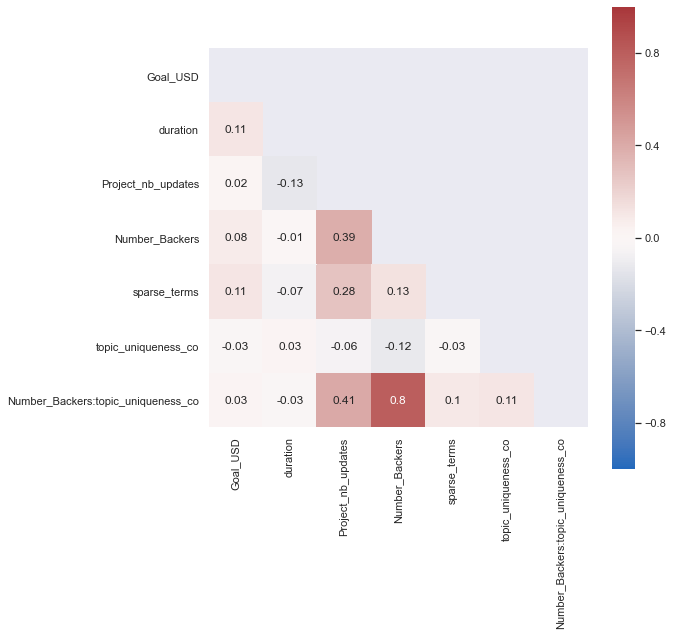

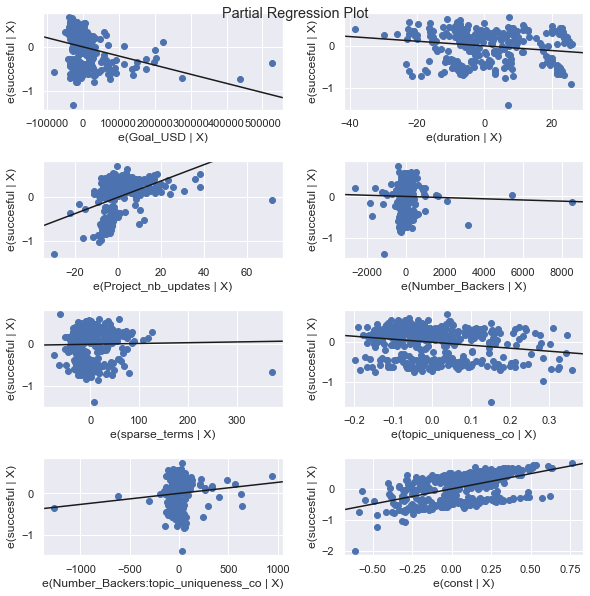

In [993]:
df_mod_backers = interaction_df[final_predictor_set + [
        'Number_Backers:topic_uniqueness_co',
        ]]

model_mod_backers = fit_probit(df_mod_backers, y_success)

### No.

## Does _topic_uniqueness_ have an interaction effect?

Optimization terminated successfully.
         Current function value: 0.199181
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              succesful   No. Observations:                  423
Model:                         Probit   Df Residuals:                      415
Method:                           MLE   Df Model:                            7
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.6730
Time:                        14:24:21   Log-Likelihood:                -84.253
converged:                       True   LL-Null:                       -257.63
Covariance Type:            nonrobust   LLR p-value:                 6.115e-71
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Goal_USD                         -3.494e-05   6.01e-06     -5.813      0.000   -4.67e-05   -2.32e-05
duration                            -0.0199      0.008     -2.478      0.013      -0.036      -0.004
Project_nb_updates                   0.1398      0.034      4.058      0.000       0.072       0.207
Number_Backers                       0.0278      0.005      5.749      0.000       0.018       0.037
sparse_terms                        -0.0074      0.009     -0.860      0.390      -0.024       0.009
topic_uniqueness_co                 -3.6983      1.587     -2.330      0.020      -6.810      -0.587
sparse_terms:topic_uniqueness_co     0.0159      0.029      0.553      0.580      -0.040       0.072
const                                1.2390      0.553      2.240      0.025       0.155       2.323
====================================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

array([[112.,  14.],
       [ 20., 277.]])

,VIF Factor,features
0,1.343630,Goal_USD
1,5.711578,duration
2,2.022329,Project_nb_updates
3,1.362009,Number_Backers
4,7.877146,sparse_terms
5,7.042135,topic_uniqueness_co
6,8.445264,sparse_terms:topic_uniqueness_co


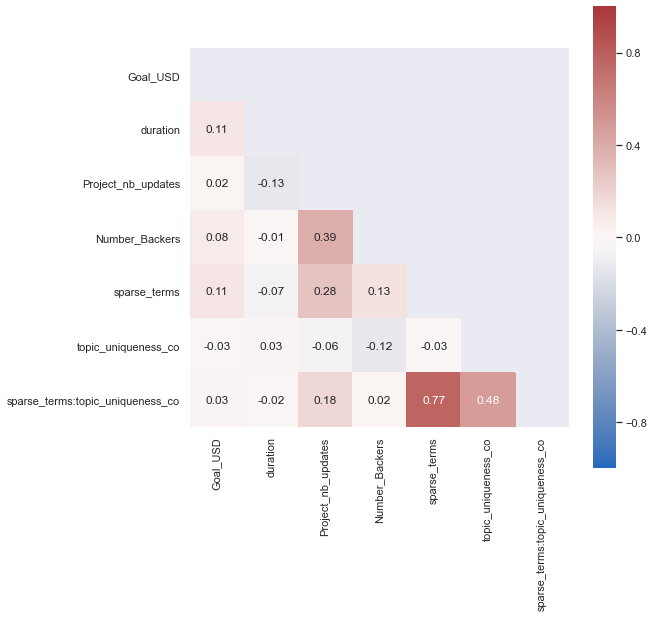

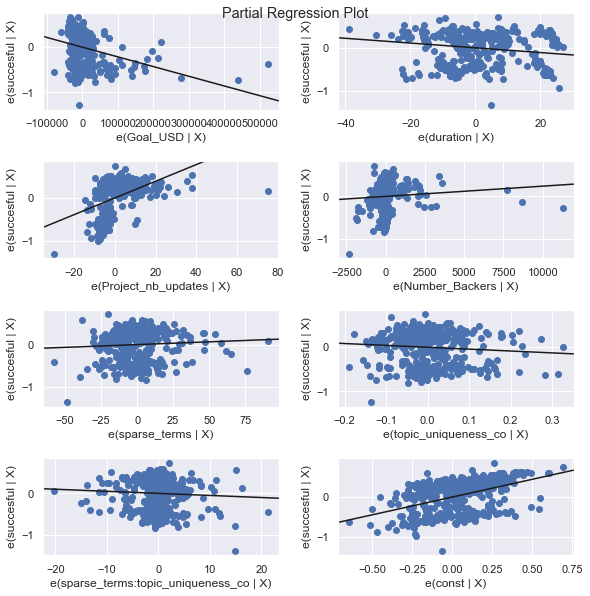

In [994]:
df_mod_topic_uniqueness = interaction_df[final_predictor_set + [
        'sparse_terms:topic_uniqueness_co',
        ]]

model_mod_topic_uniqueness = fit_probit(df_mod_topic_uniqueness, y_success)

### No.

In [ ]:
!jupyter nbconvert --to pdf regression_notebook.ipynb